In [1]:
import yaml

In [13]:
auth = yaml.load(open('auth.yaml'))

In [4]:
import requests

In [24]:
def get_activities(page):
    headers = {"Authorization": "Bearer {access_token}".format(**auth)}
    params = {'before': None, 'after': None, 'page': page, 'per_page': None}
    url = 'https://www.strava.com/api/v3/athlete/activities'
    return requests.get(url, headers=headers, params=params).json()

In [25]:
import itertools

In [28]:
def iter_activitiy_pages():
    for i in itertools.count(1):
        page = get_activities(i)
        if page:
            yield page
        else:
            break

In [29]:
def iter_activities():
    for page in iter_activitiy_pages():
        for activity in page:
            yield activity

In [31]:
activities = list(iter_activities())

In [33]:
import pandas

In [34]:
df = pandas.DataFrame(activities)

In [37]:
%matplotlib inline

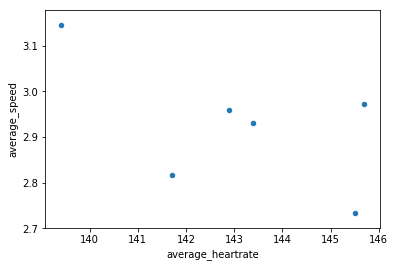

In [41]:
df.plot.scatter('average_heartrate', 'average_speed')